### An example showing the modelplotpy class  used by a scikit-learn classifier

In this example, we'll be plotting a `modelplotpy` to describe the classifier model performance
using the **breast_cancer**, **iris** or **digits** dataset from scikit-learn.
- `LogisticRegression`
- `RandomForestClassifier`

Here, we'll be using the `scikitplot.modelplotpy` class.

# modelplotpy: a brief introduction

> https://archive.ics.uci.edu/dataset/222/bank+marketing

py
- https://modelplot.github.io/intro_modelplotpy.html
- https://medium.com/cmotions/visualise-the-business-value-of-predictive-models-21c6bc8132c

R
- https://modelplot.github.io/intro_modelplotr.html
- https://medium.com/cmotions/tutorial-evaluate-the-business-value-of-predictive-models-in-r-b21bd19adbc8

In [21]:
from sklearn.datasets import (
    make_classification,
    load_breast_cancer as data_2_classes,
    load_iris as data_3_classes,
    load_digits as data_10_classes,
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

import numpy as np; np.random.seed(0)
# importing pylab or pyplot
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 5)

# Import scikit-plot
import scikitplot as sp
sp.__version__

'0.4.1.dev0+git20241223.1edc8f2'

In [22]:
# import scikitplot as sp
import scikitplot.modelplotpy as mp
mp.__version__

'1.0.0'

In [23]:
mp.modelplotpy?

Init signature:
mp.modelplotpy(
    feature_data=[],
    label_data=[],
    dataset_labels=[],
    models=[],
    model_labels=[],
    ntiles=10,
    seed=0,
)
Docstring:     
ModelPlotPy decile analysis.

Parameters
----------
feature_data : list of objects (n_datasets, )
    Objects containing the X matrix for one or more different datasets.
    
label_data : list of objects (n_datasets, )
    Objects of the y vector for one or more different datasets.
    
dataset_labels : list of str (n_datasets, )
    Containing the names of the different `feature_data`
    and `label_data` combination pairs.

models : list of objects (n_models, )
    Containing the sk-learn model objects.

model_labels : list of str (n_models, )
    Names of the (sk-learn) models.

ntiles : int, default 10
    The number of splits range is (2, inf]:
    
    - 10 is called `deciles`
    - 100 is called `percentiles`
    - any other value is an `ntile`

seed : int, default=0
    Making the splits reproducible.

  

In [24]:
dir(mp)

['ModelPlotPy',
 '__author__',
 '__author_email__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__githash__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_check_input',
 '_modelplotpy',
 '_range01',
 'modelplotpy',
 'plot_all',
 'plot_costsrevs',
 'plot_cumgains',
 'plot_cumlift',
 'plot_cumresponse',
 'plot_profit',
 'plot_response',
 'plot_roi']

In [25]:
import io
import os
import requests
import zipfile
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#r = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip")
# we encountered that the source at uci.edu is not always available, therefore we made a copy to our repos.
r = requests.get('https://modelplot.github.io/img/bank-additional.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
# You can change the path, currently the data is written to the working directory
path = os.getcwd()
z.extractall(path)
bank = pd.read_csv(path + "/bank-additional/bank-additional-full.csv", sep = ';')

# select the 6 columns
bank = bank[['y', 'duration', 'campaign', 'pdays', 'previous', 'euribor3m']]
# rename target class value 'yes' for better interpretation
bank.y[bank.y == 'yes'] = 'term deposit'

# dimensions of the data
print(bank.shape)

# show the first rows of the dataset
bank

(41188, 6)


,y,duration,campaign,pdays,previous,euribor3m
0,no,261,1,999,0,4.857
1,no,149,1,999,0,4.857
2,no,226,1,999,0,4.857
3,no,151,1,999,0,4.857
4,no,307,1,999,0,4.857
...,...,...,...,...,...,...
41183,term deposit,334,1,999,0,1.028
41184,no,383,1,999,0,1.028
41185,no,189,2,999,0,1.028
41186,term deposit,442,1,999,0,1.028


In [26]:
# to create predictive models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# define target vector y
y = bank.y
# define feature matrix X
X = bank.drop('y', axis = 1)

# Create the necessary datasets to build models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2018)

# Instantiate a few classification models
clf_mult = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg').fit(X_train, y_train)
clf_rf = RandomForestClassifier().fit(X_train, y_train)

In [27]:
obj = mp.modelplotpy(
    feature_data = [X_train, X_test],
    label_data = [y_train, y_test],
    dataset_labels = ['train data', 'test data'],
    models = [clf_rf, clf_mult],
    model_labels = ['random forest', 'multinomial logit'],
    ntiles = 10
)
# transform data generated with prepare_scores_and_deciles into aggregated data for chosen plotting scope 
ps = obj.plotting_scope(
    select_model_label = ['random forest'],
    select_dataset_label = ['test data'],
    scope='compare_models'
)
obj.get_params()

compare models
The label with smallest class is ['term deposit']


{'feature_data': [       duration  campaign  pdays  previous  euribor3m
  10013       514         4    999         0      4.959
  26717        92         2    999         0      4.076
  6902        297         1    999         0      4.860
  37534       275         1    999         0      0.873
  22795        90         2    999         0      4.965
  ...         ...       ...    ...       ...        ...
  35718        74         2    999         0      1.244
  10388        27         3    999         0      4.960
  40092       305         4      3         1      0.827
  19209       902         2    999         0      4.967
  14562       182         1    999         0      4.961
  
  [28831 rows x 5 columns],
         duration  campaign  pdays  previous  euribor3m
  19607       276         1    999         0      4.968
  18843       498         1    999         0      4.970
  3476        196         4    999         0      4.860
  21897       196         1    999         0      4.964
 

In [28]:
obj.ntiles

10

## Gains, Lift and (cumulative) Response plots

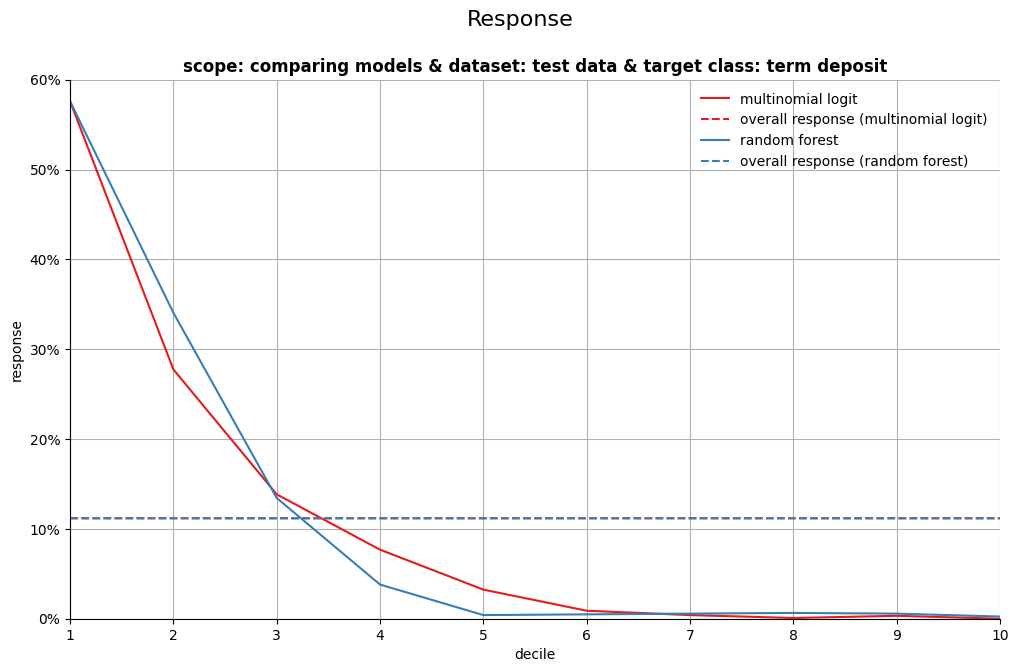

In [29]:
# plot the response plot and annotate the plot at decile = 2
ax = mp.plot_response(
    ps,
    save_fig=False,
)

When we select decile 3 from model multinomial logit in dataset test data the percentage of term deposit cases in the selection is 13%.
When we select decile 3 from model random forest in dataset test data the percentage of term deposit cases in the selection is 13%.


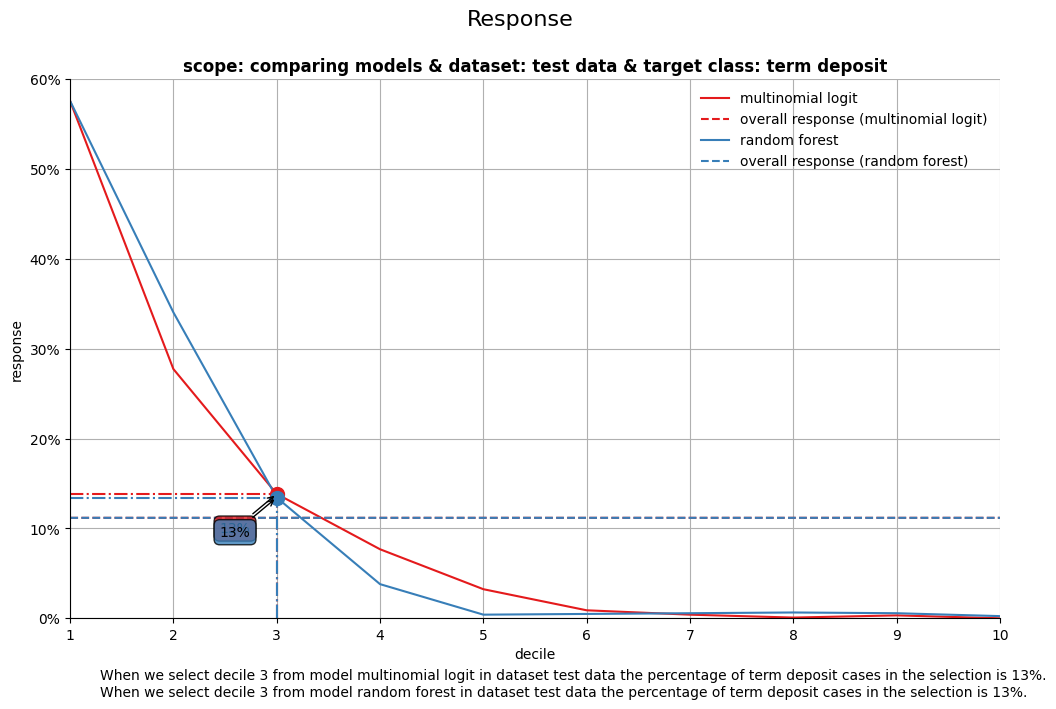

In [10]:
# plot the response plot and annotate the plot at decile = 2
ax = mp.plot_response(
    ps,
    highlight_ntile = 3,
    save_fig=False,
)

When we select deciles 1 until 3 according to model multinomial logit in dataset test data the percentage of term deposit cases in the selection is 33%.
When we select deciles 1 until 3 according to model random forest in dataset test data the percentage of term deposit cases in the selection is 35%.


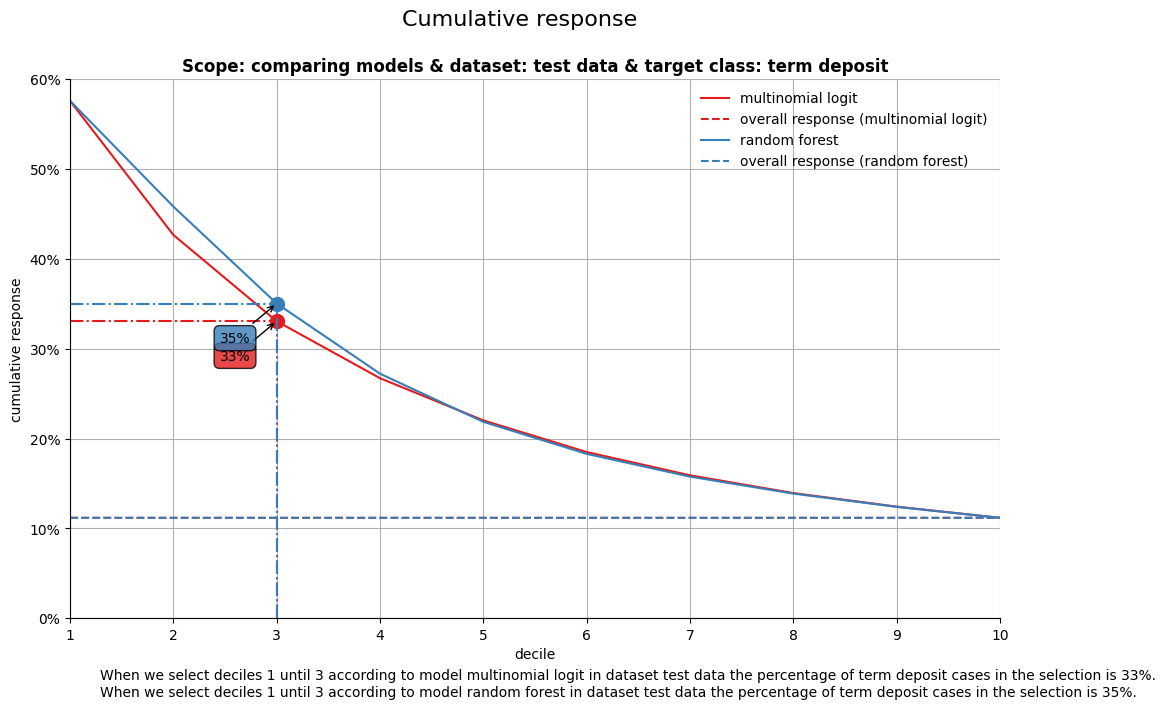

<Axes: title={'center': 'Scope: comparing models & dataset: test data & target class: term deposit'}, xlabel='decile', ylabel='cumulative response'>

In [11]:
# plot the cumulative response plot and annotate the plot at decile = 3
mp.plot_cumresponse(
    ps,
    highlight_ntile = 3,
    save_fig=False,
)

When we select 30% with the highest probability according to model multinomial logit, this selection holds 88% of all term deposit cases in dataset test data.
When we select 30% with the highest probability according to model random forest, this selection holds 93% of all term deposit cases in dataset test data.


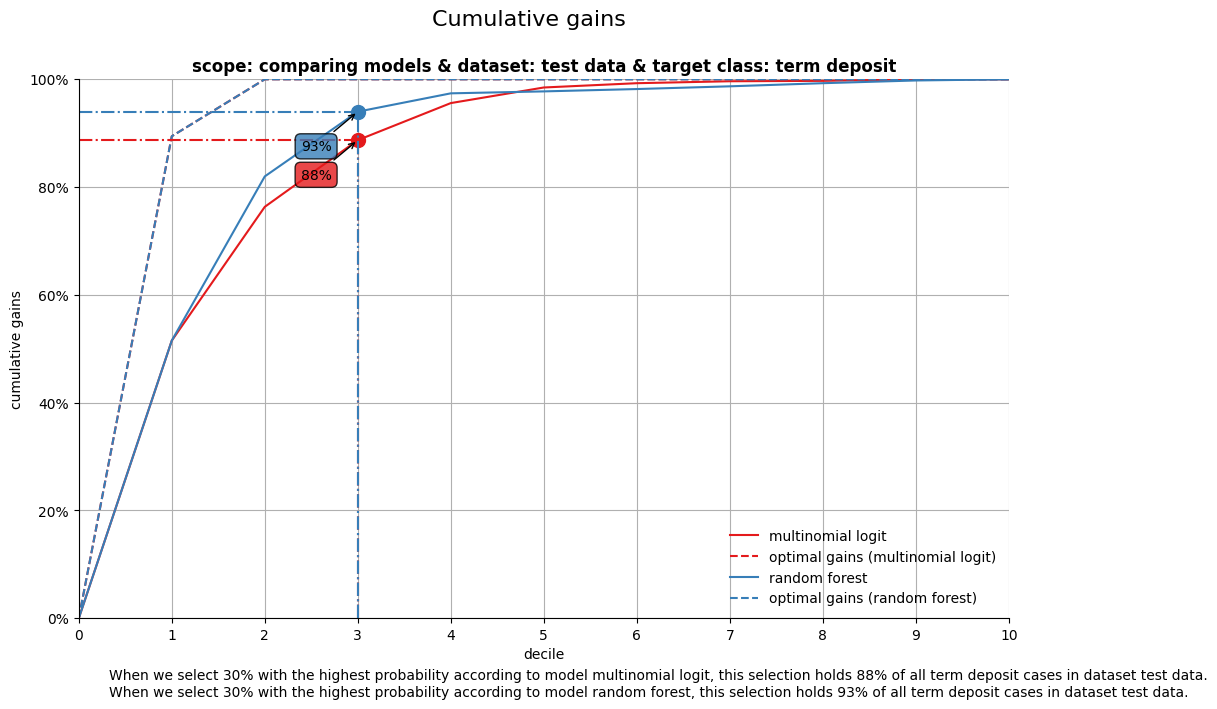

In [12]:
# plot the cumulative gains plot and annotate the plot at decile = 2
mp.plot_cumgains(
    ps,
    highlight_ntile = 3,
    save_fig=False,
);

When we select 30% with the highest probability according to model multinomial logit in dataset test data, this selection for target class term deposit is 2.96 times than selecting without a model.
When we select 30% with the highest probability according to model random forest in dataset test data, this selection for target class term deposit is 3.13 times than selecting without a model.


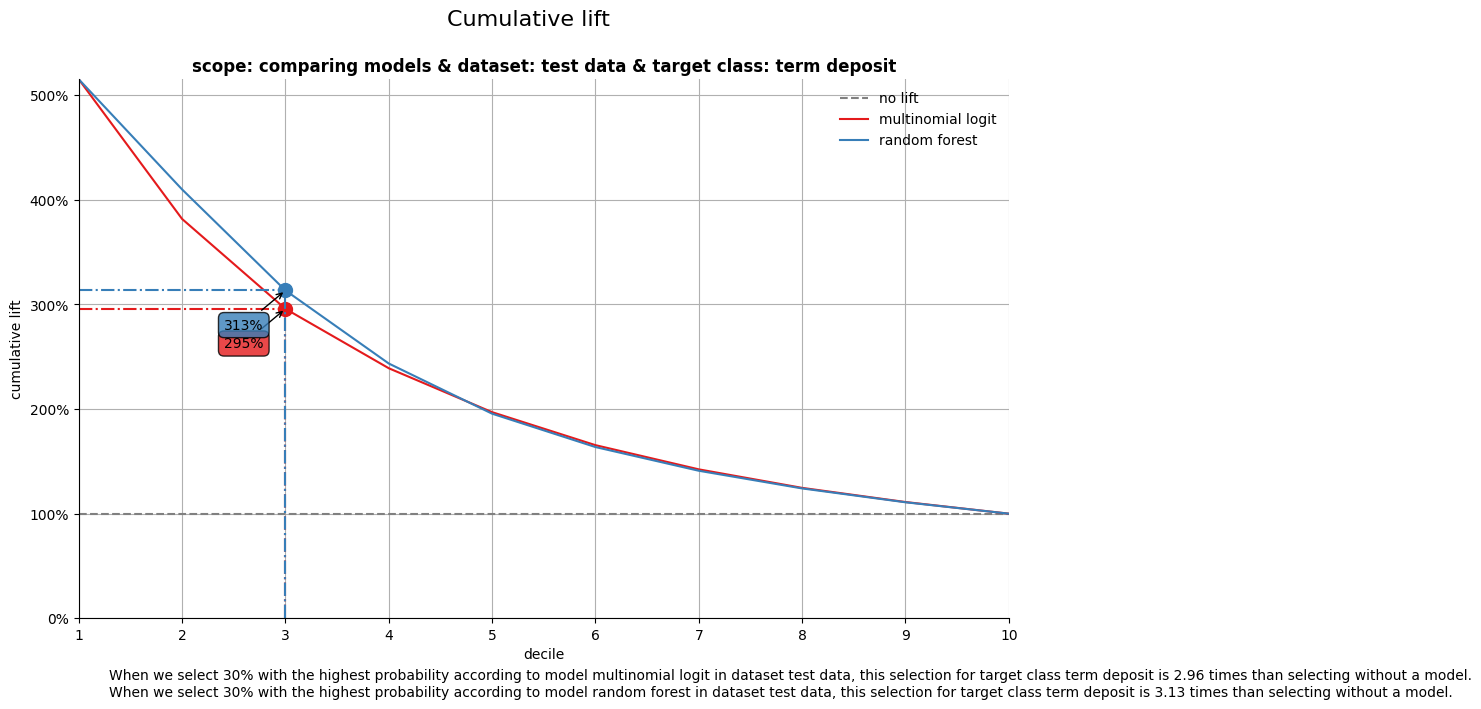

In [13]:
# plot the cumulative lift plot and annotate the plot at decile = 2
mp.plot_cumlift(
    ps,
    highlight_ntile = 3,
    save_fig=False,
);

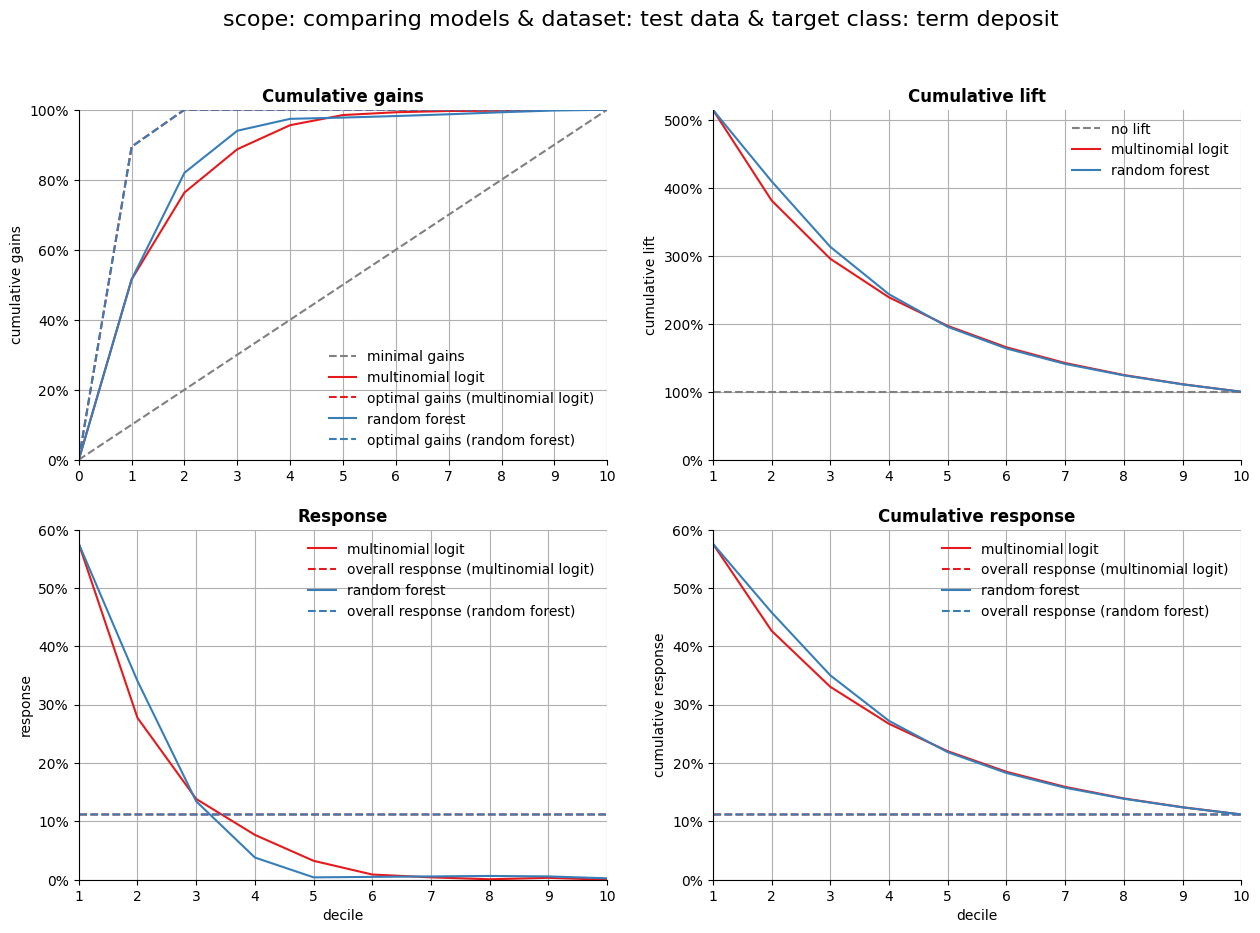

In [14]:
# plot all four evaluation plots and save to file
mp.plot_all(
    ps,
    save_fig=False,
    # save_fig = True,
    # save_fig_filename = 'Selection model Term Deposits'
);

## Financial Implications

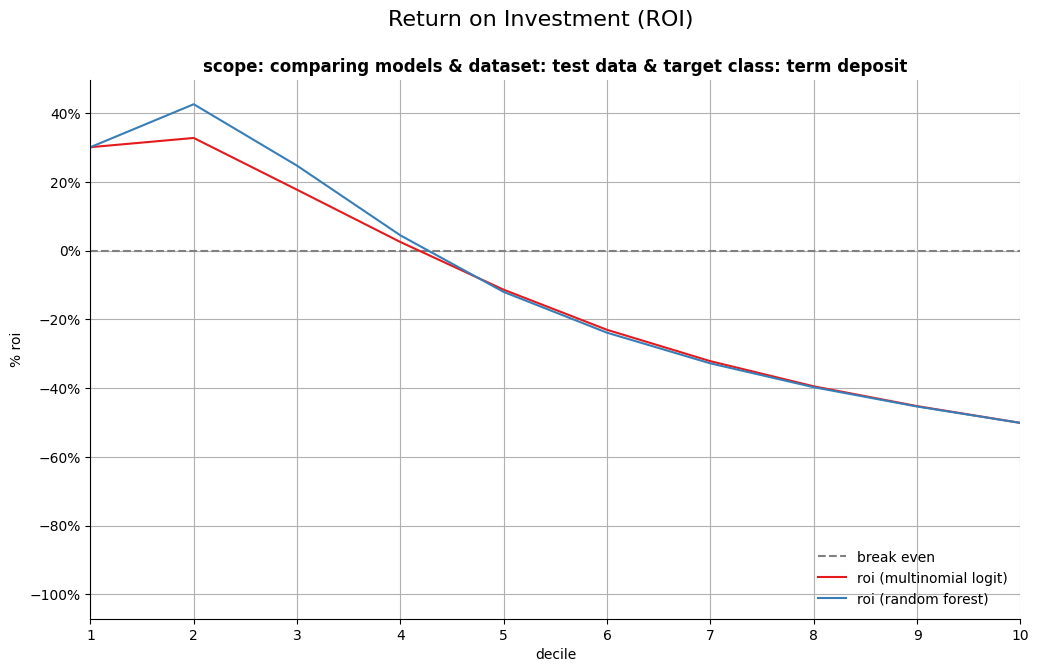

In [15]:
mp.plot_roi(
    ps,
    fixed_costs = 15000,
    variable_costs_per_unit = 10,
    profit_per_unit = 50,
    save_fig=False,
);

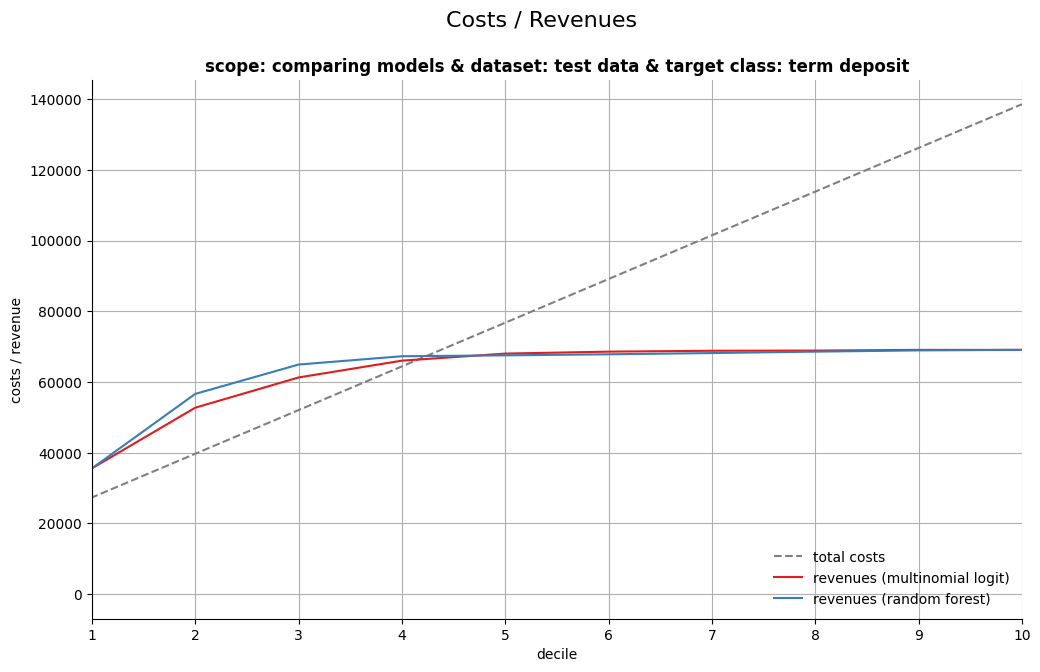

In [16]:
mp.plot_costsrevs(
    ps,
    fixed_costs = 15000,
    variable_costs_per_unit = 10,
    profit_per_unit = 50,
    save_fig=False,
);

When we select decile 1 until 2 from model multinomial logit in dataset test data the percentage of term deposit cases in the expected profit is 13030.
When we select decile 1 until 2 from model random forest in dataset test data the percentage of term deposit cases in the expected profit is 16930.


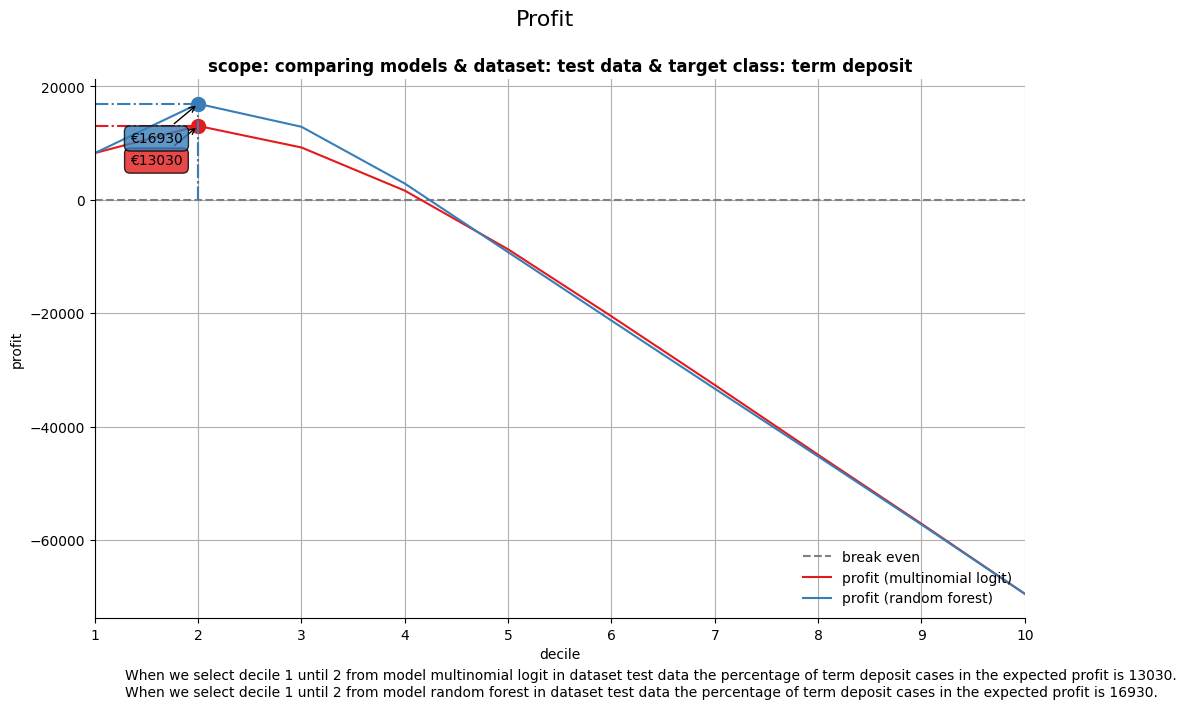

In [17]:
mp.plot_profit(
    ps,
    fixed_costs = 15000,
    variable_costs_per_unit = 10,
    profit_per_unit = 50,
    highlight_ntile=2,
    save_fig=False,
);

# Get more out of modelplotpy: using different scopes

In [18]:
# set plotting scope to model comparison
ps2 = obj.plotting_scope(
    scope = "compare_models",
    select_dataset_label=['test data']
)

compare models
The label with smallest class is ['term deposit']


When we select deciles 1 until 3 according to model multinomial logit in dataset test data the percentage of term deposit cases in the selection is 33%.
When we select deciles 1 until 3 according to model random forest in dataset test data the percentage of term deposit cases in the selection is 35%.


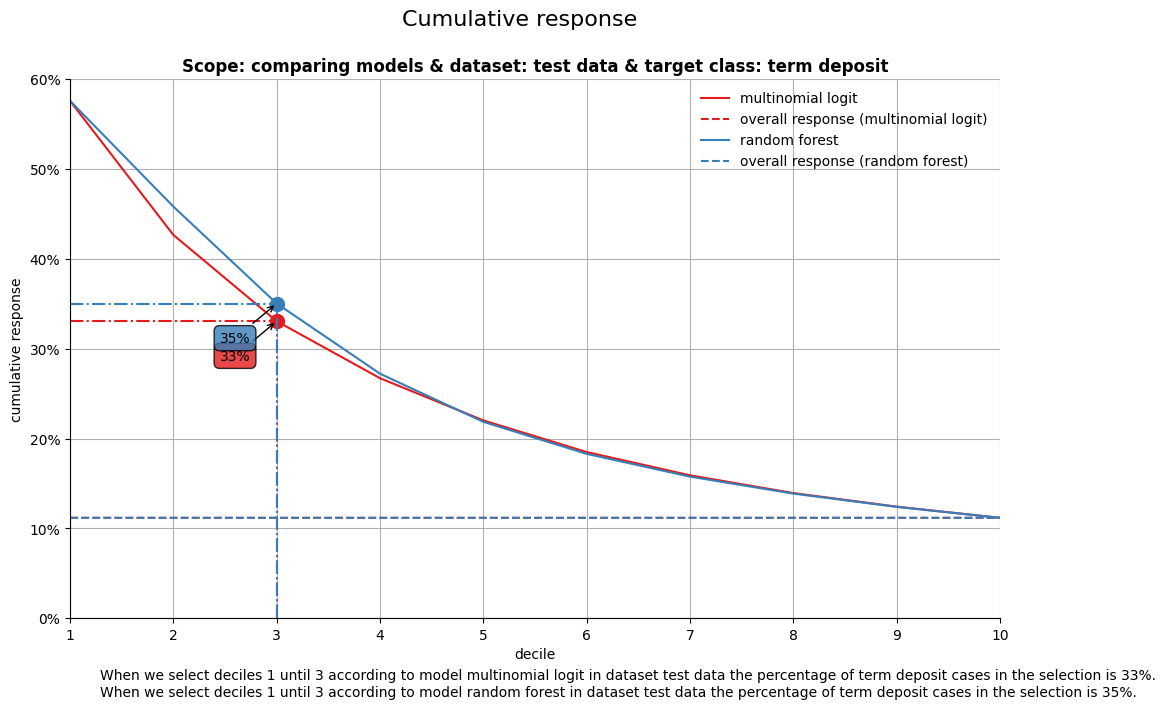

In [19]:
# plot the cumulative response plot and annotate the plot at decile = 3
mp.plot_cumresponse(
    ps2,
    highlight_ntile = 3,
    save_fig=False,
);

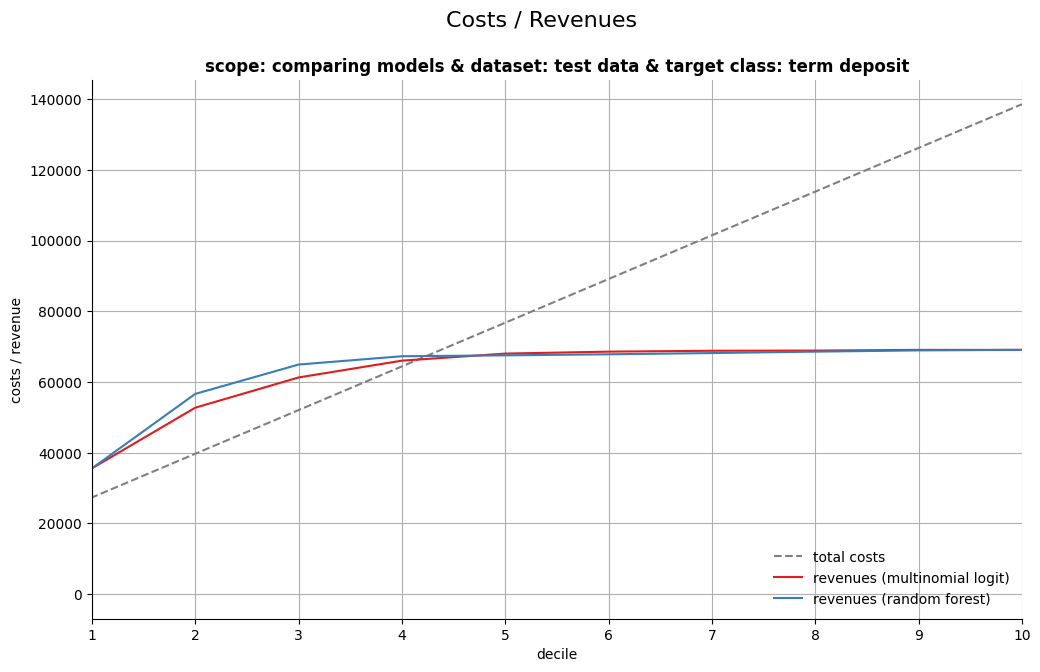

In [20]:
mp.plot_costsrevs(
    ps2,
    fixed_costs = 15000,
    variable_costs_per_unit = 10,
    profit_per_unit = 50,
    save_fig=False,
);

In [18]:
# from IPython.core.display import display,HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))
# display(HTML('<style>.prompt{width: 0px; min-width: 0px; visibility: collapse}</style>'))
#np.set_printoptions(linewidth=110)